# Exploration of Logits for Bias Inspection: CheXpert

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn import decomposition

In [2]:
# Define constants
alpha = 0.6
style = 'o'
markersize = 40
fontscale = 1.6
color_palette = 'tab10'
kind = 'scatter'
rasterized_scatter = True
out_dpi = 300
out_format = 'png'
RANDOM_STATE = 42

In [3]:
import ast

def get_model_features(
    model_id: str,
    model_dir: str,
):
    model_df = pd.read_csv(f'{model_dir}/{model_id}/test_predictions.csv')
    model_df['Logits'] = model_df['Logits'].apply(ast.literal_eval)
    model_df['Logit - No Finding'] = model_df['Logits'].apply(lambda x: x[0])
    model_df['Logit - Other'] = model_df['Logits'].apply(lambda x: x[1])

    model_df['Labels'] = model_df['Labels'].replace({0: 'No Finding', 1: 'Other'})
    model_df['Sex'] = model_df['Sex'].replace({0: 'Male', 1: 'Female'})
    model_df['Age'] = model_df['Age'].replace({0: '<60', 1: '60+'})
    model_df['Race'] = model_df['Race'].replace({0: 'White', 1: 'Non-White'})
    return model_df


def plot_logits(
    label: str,
    df: pd.DataFrame,
    hue_order: list[str],
    model_id: str,
    save_dir: str,
):
            
    x_data = 'Logit - No Finding'
    y_data = 'Logit - Other'
    # Scatter with distributions
    sns.set_theme(style="white", palette=color_palette, font_scale=fontscale)
    fig = sns.jointplot(x=x_data, y=y_data, hue=label, kind=kind, alpha=alpha, marker=style, s=markersize, hue_order=hue_order, data=df, joint_kws=dict(rasterized=rasterized_scatter), marginal_kws={'common_norm': False})
    fig.ax_joint.legend(loc='upper right')
    plt.savefig(save_dir + 'logits-0+1' + '-' + model_id + '-' + label + '.' + out_format, bbox_inches='tight', dpi=out_dpi)

    # Just distributions
    sns.set_theme(style="white", palette=color_palette, font_scale=fontscale)
    fig, ax = plt.subplots(figsize=(10,3))
    g = sns.kdeplot(x=x_data, hue=label, fill=True, hue_order=hue_order, data=df, ax=ax, common_norm=False)
    g.get_legend().set_title(None)
    g.spines[['right', 'top']].set_visible(False)
    plt.savefig(save_dir + 'logits-0' + '-' + model_id + '-' + label + '-marginal.' + out_format, bbox_inches='tight', dpi=out_dpi)

    sns.set_theme(style="white", palette=color_palette, font_scale=fontscale)
    fig, ax = plt.subplots(figsize=(10,3))
    g = sns.kdeplot(x=y_data, hue=label, fill=True, hue_order=hue_order, data=df, ax=ax, common_norm=False)
    g.get_legend().set_title(None)
    g.spines[['right', 'top']].set_visible(False)
    plt.savefig(save_dir + 'logits-1' + '-' + model_id + '-' + label + '-marginal.' + out_format, bbox_inches='tight', dpi=out_dpi)

def plot_and_save_all_logits(
    model_id: str,
    data_name: str,
    model_dir: str,
    sample: bool = False,
    teacher: bool = False,
):
    
    model_df = get_model_features(model_id, model_dir)

    if teacher:
        save_dir = f'teacher_{model_id}/'
    else:
        save_dir = f'{data_name}/{model_id}/'

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    if sample:
        model_df = model_df.sample(frac=0.1, random_state=RANDOM_STATE)

    plot_logits(
        label='Labels',
        df=model_df,
        hue_order=['No Finding', 'Other'],
        model_id=model_id,
        save_dir=save_dir,
    )

    plot_logits(
        label='Sex',
        df=model_df,
        hue_order=['Male', 'Female'],
        model_id=model_id,
        save_dir=save_dir,
    )

    plot_logits(
        label='Age',
        df=model_df,
        hue_order=['<60', '60+'],
        model_id=model_id,
        save_dir=save_dir,
    )

    plot_logits(
        label='Race',
        df=model_df,
        hue_order=['White', 'Non-White'],
        model_id=model_id,
        save_dir=save_dir,
    )

### Teachers

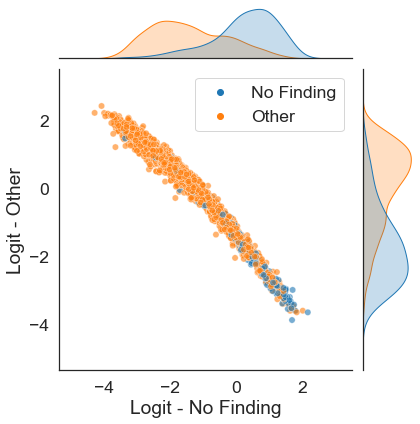

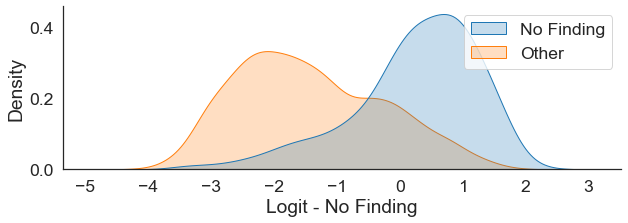

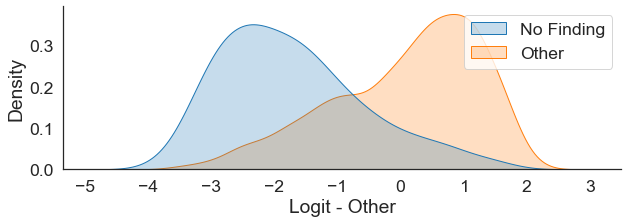

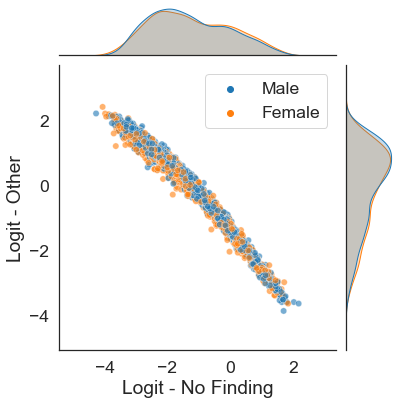

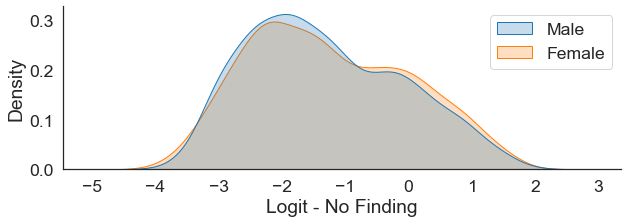

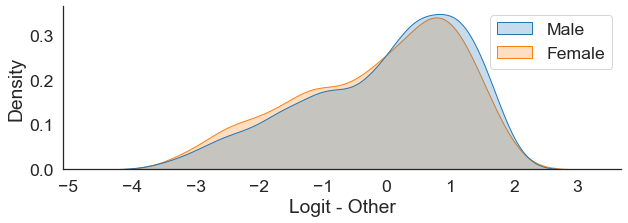

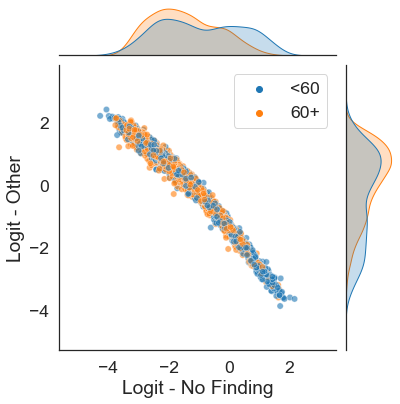

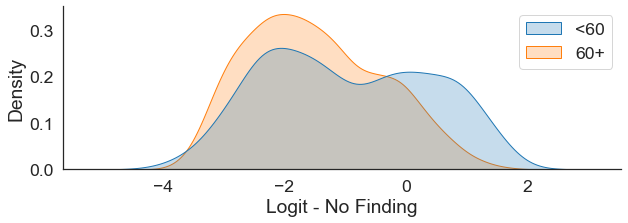

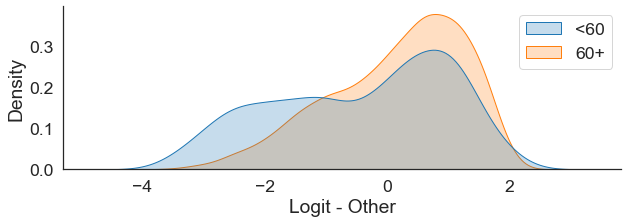

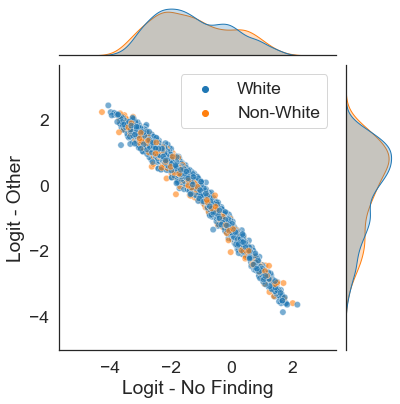

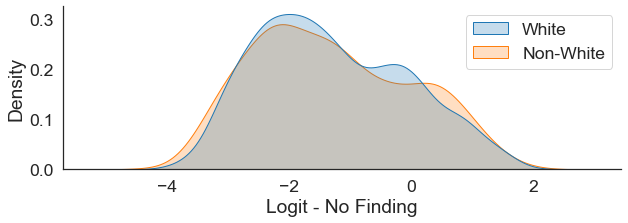

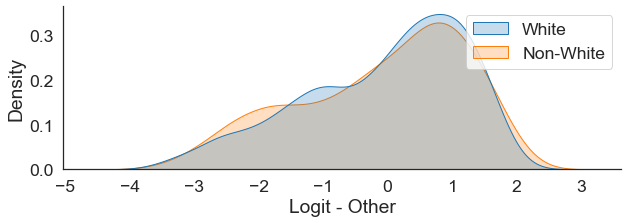

In [4]:
plot_and_save_all_logits(
    model_id='r34-sam1-s43',
    model_dir='../../results/chexpert/resnet',
    data_name='chexpert',
    sample=True,
    teacher=True,
)

### Students

#### No Female

##### Resnet18

/tmp/ipykernel_2806076/3016710375.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


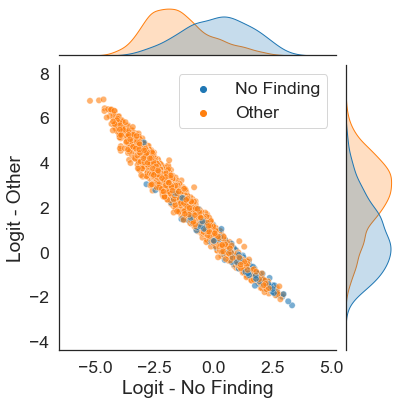

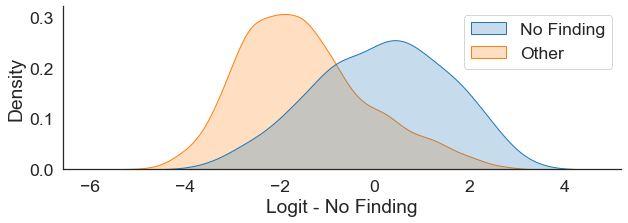

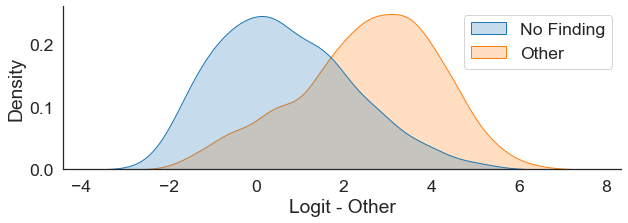

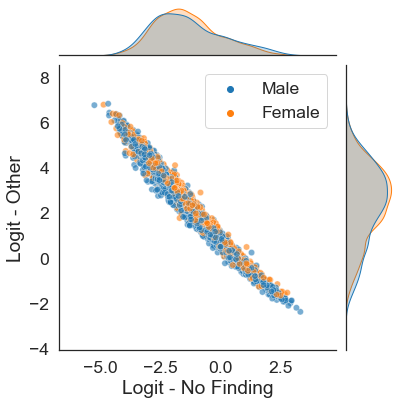

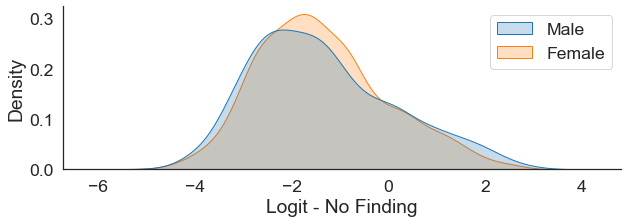

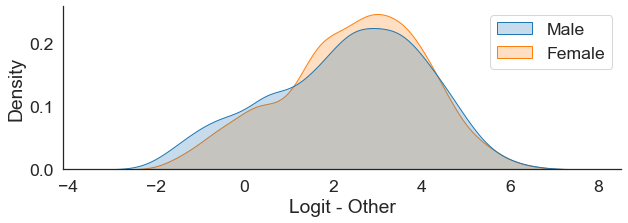

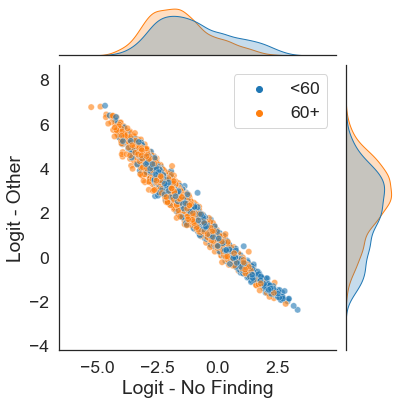

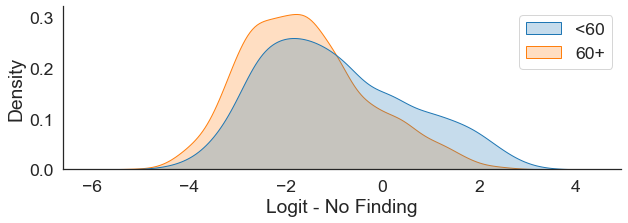

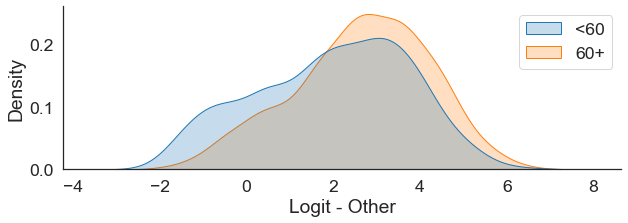

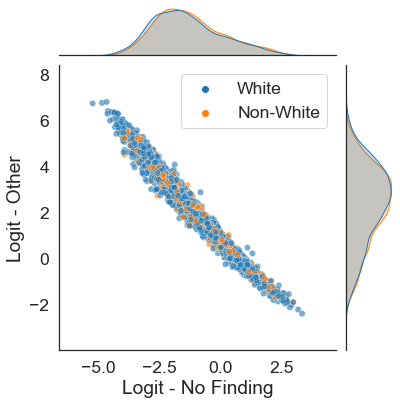

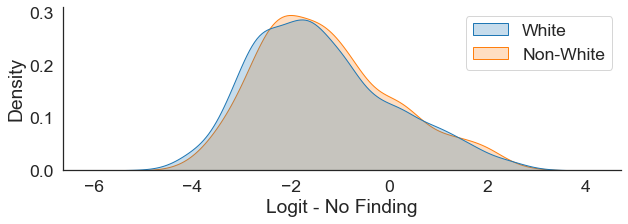

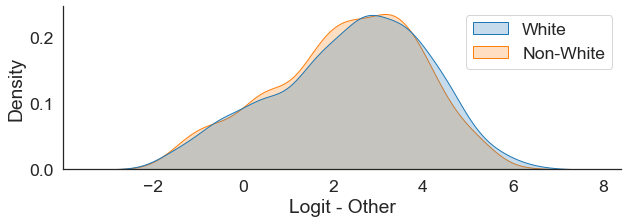

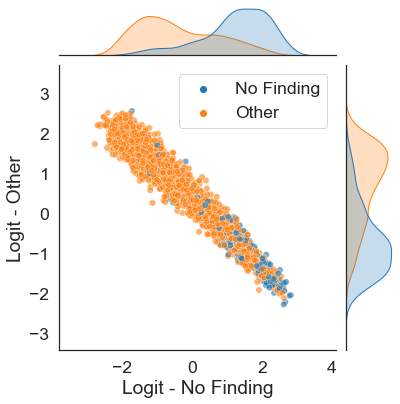

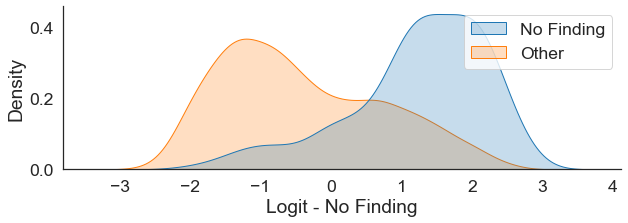

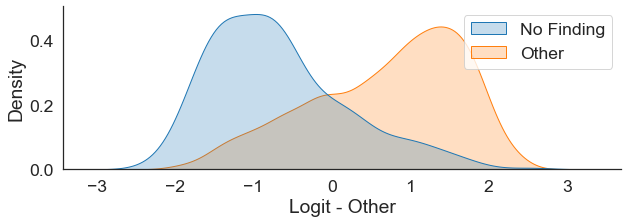

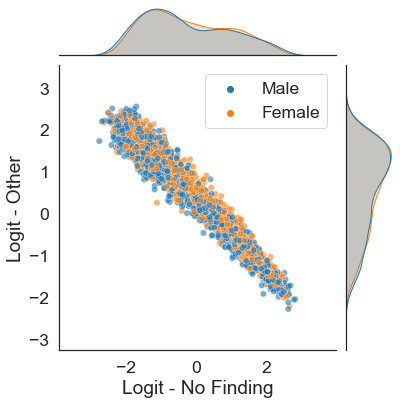

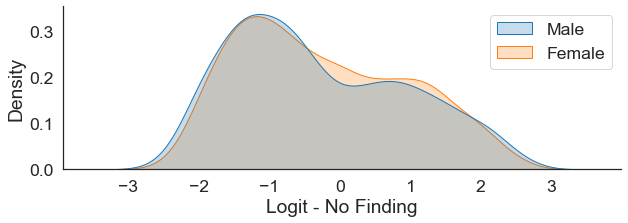

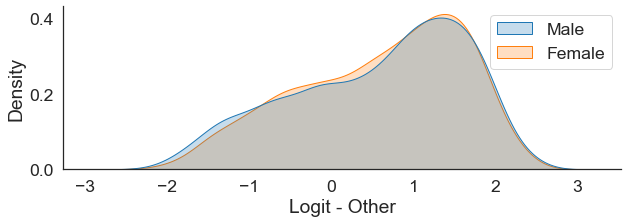

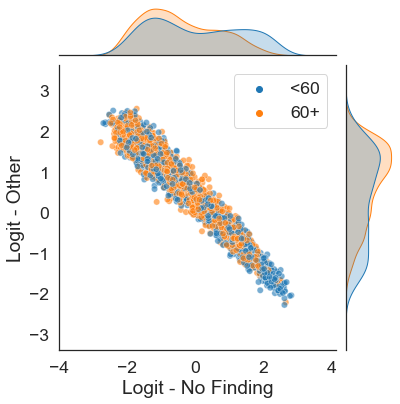

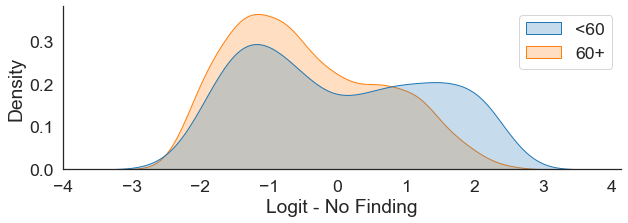

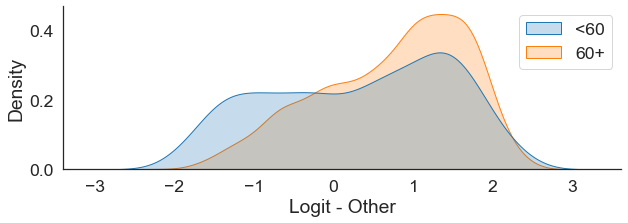

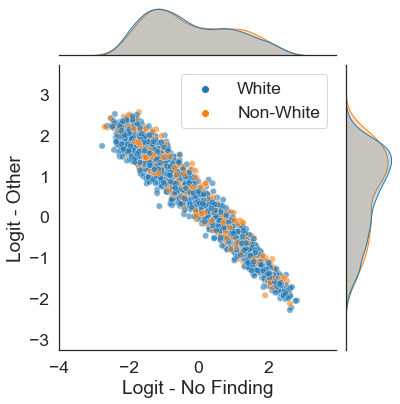

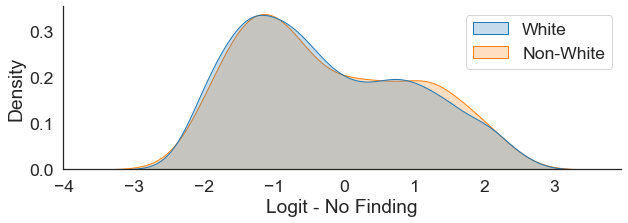

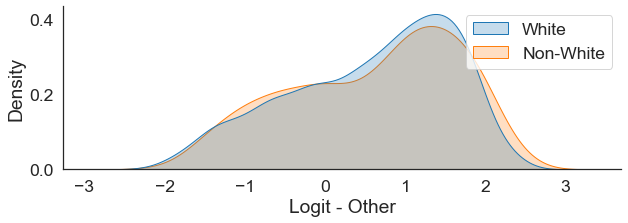

In [5]:
# Resnet18: Seed 46

# Without KD
plot_and_save_all_logits(
    model_id='r18-sam1-s46',
    model_dir='../../results/chexpert_no_female/resnet',
    data_name='chexpert_no_female',
    sample=True,
    teacher=False,
)

# With KD
plot_and_save_all_logits(
    model_id='r18-sam1-kd1-s46_r34-sam1-s43',
    model_dir='../../results/chexpert_no_female/kd',
    data_name='chexpert_no_female',
    sample=True,
    teacher=False,
)

##### Resnet34

/tmp/ipykernel_2806076/3016710375.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


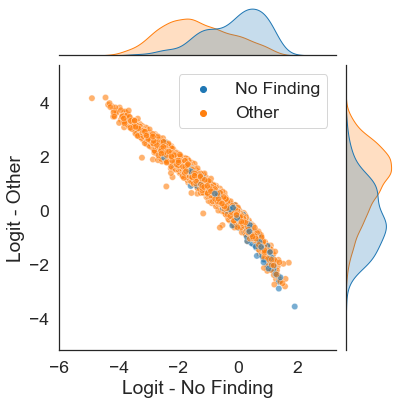

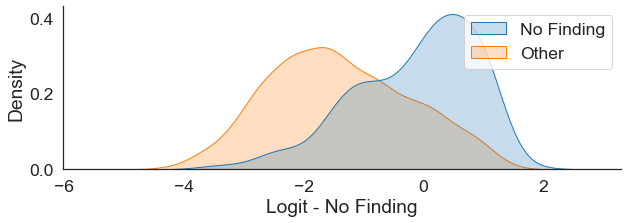

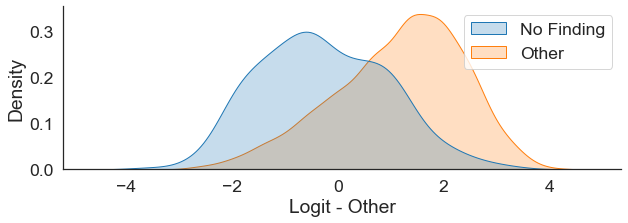

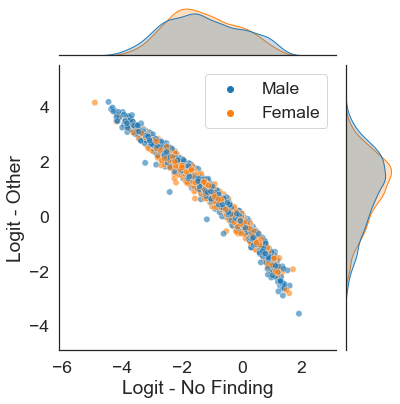

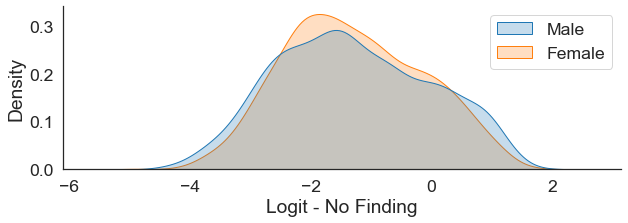

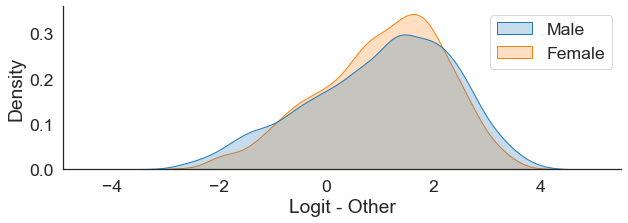

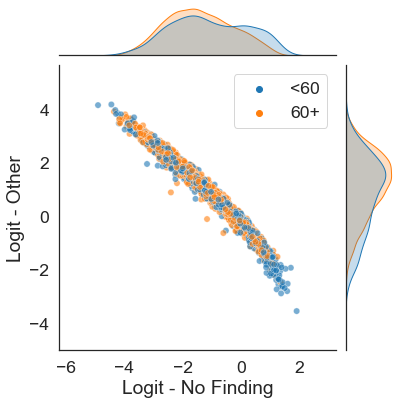

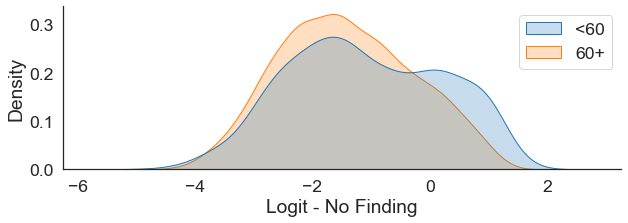

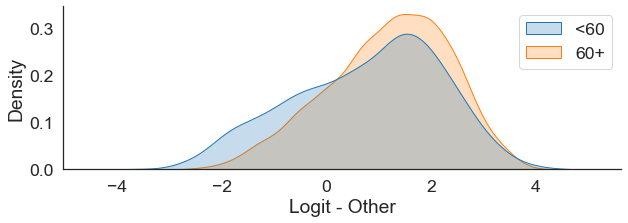

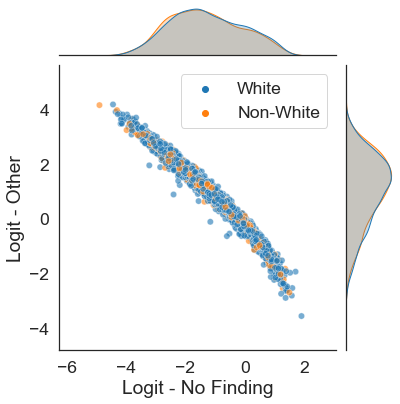

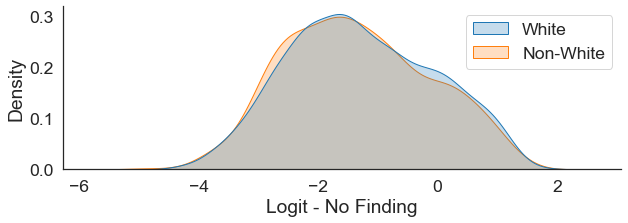

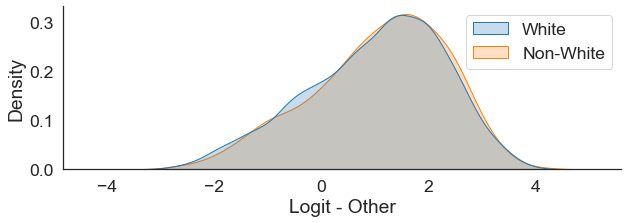

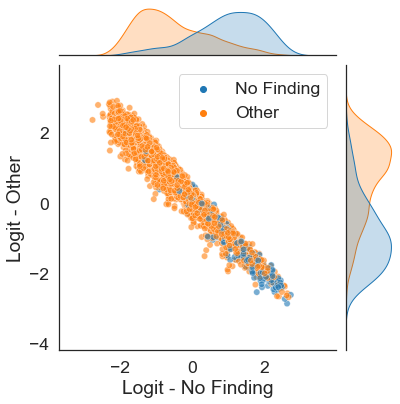

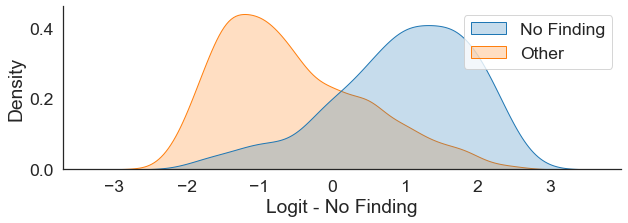

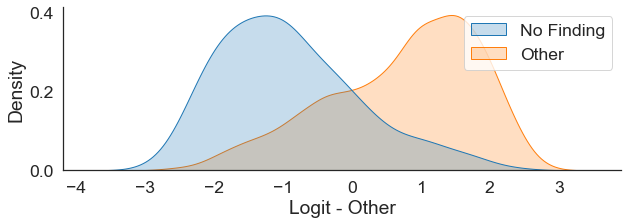

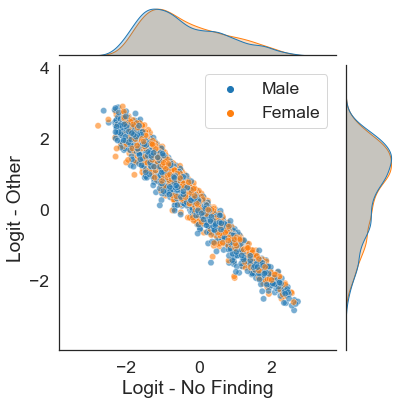

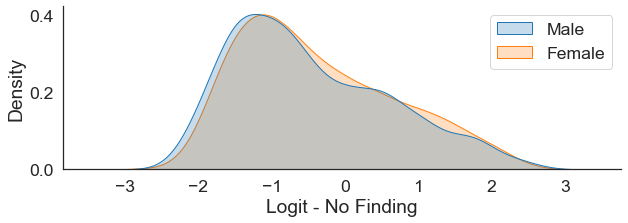

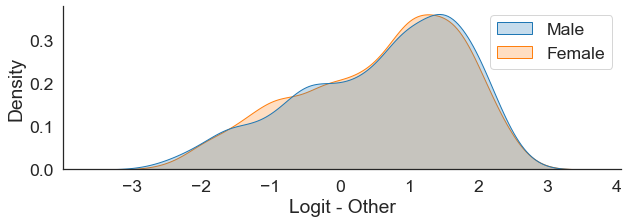

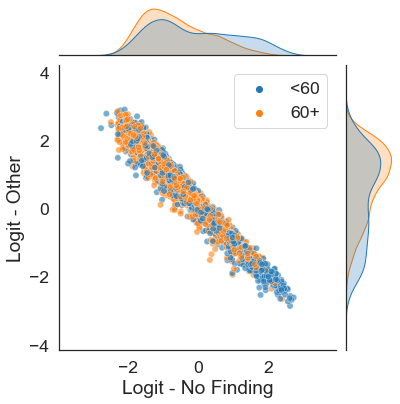

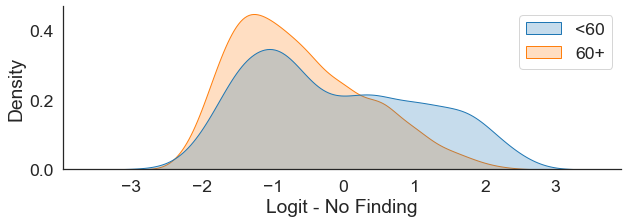

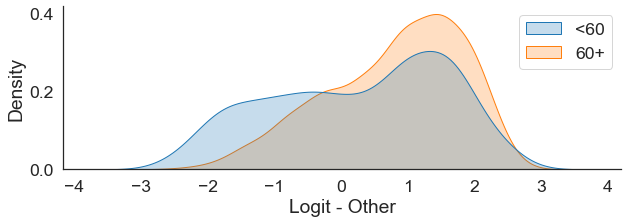

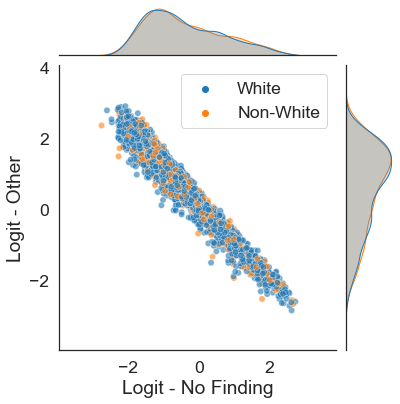

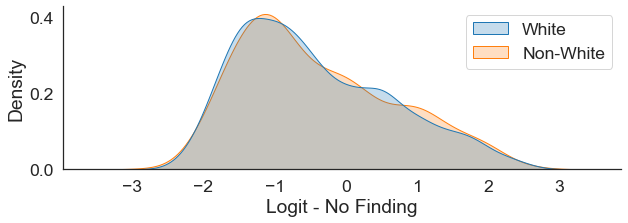

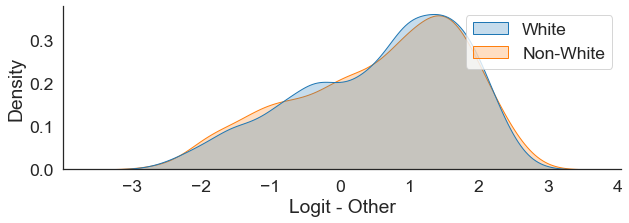

In [6]:
# Resnet34: Seed 45

# Without KD
plot_and_save_all_logits(
    model_id='r34-sam1-s45',
    model_dir='../../results/chexpert_no_female/resnet',
    data_name='chexpert_no_female',
    sample=True,
    teacher=False,
)

# With KD
plot_and_save_all_logits(
    model_id='r34-sam1-kd1-s45_r34-sam1-s43',
    model_dir='../../results/chexpert_no_female/kd',
    data_name='chexpert_no_female',
    sample=True,
    teacher=False,
)

#### No Old

##### Resnet18

/tmp/ipykernel_2806076/3016710375.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


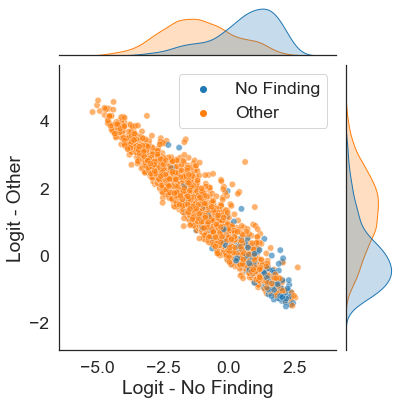

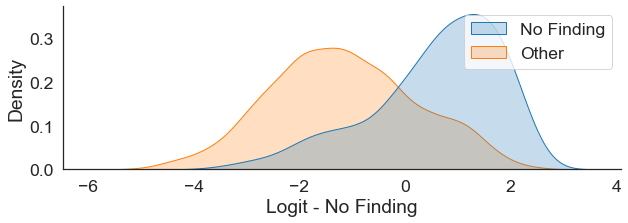

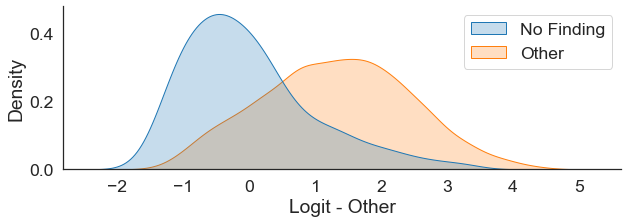

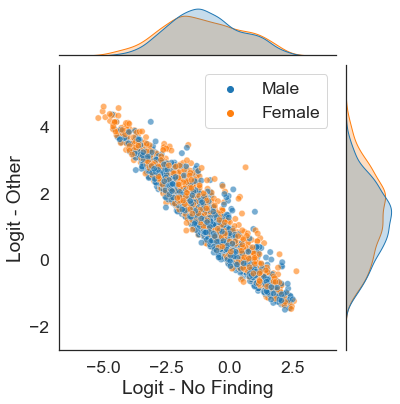

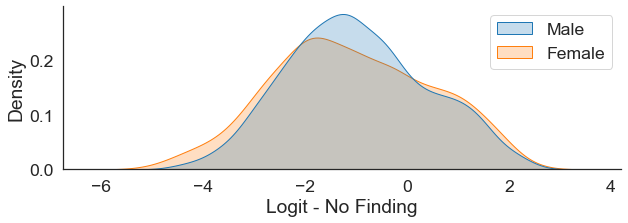

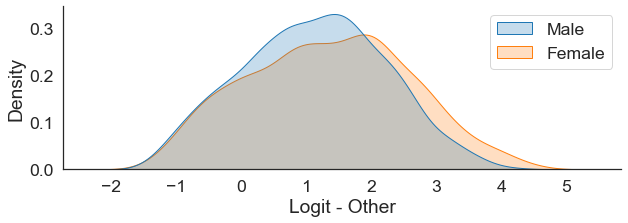

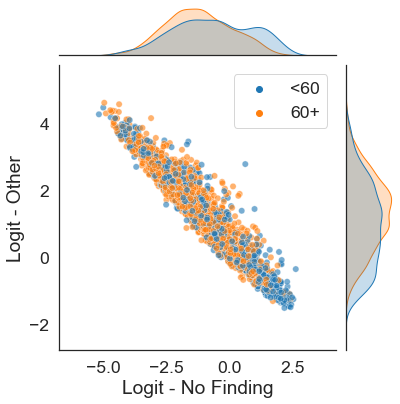

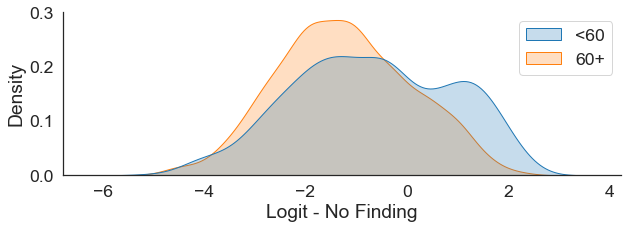

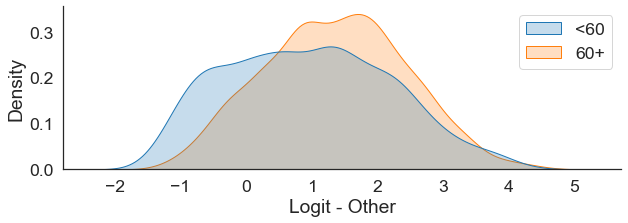

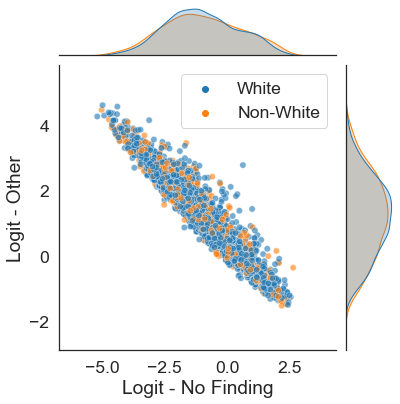

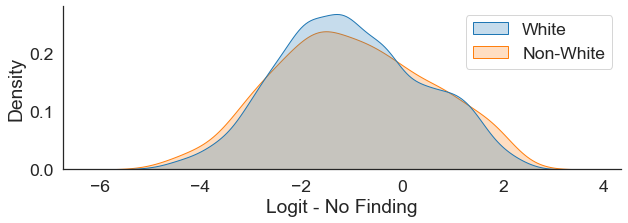

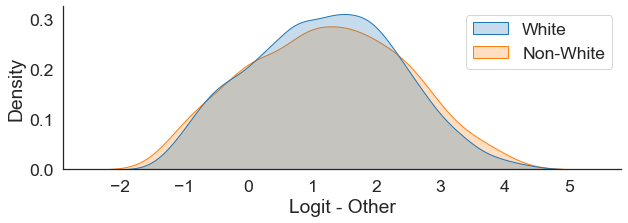

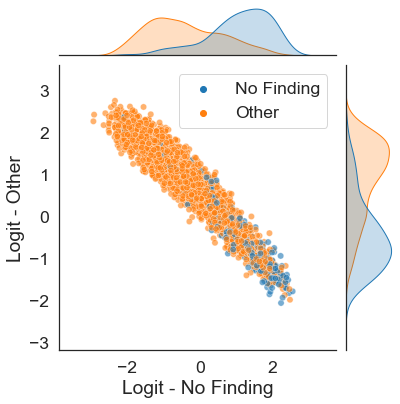

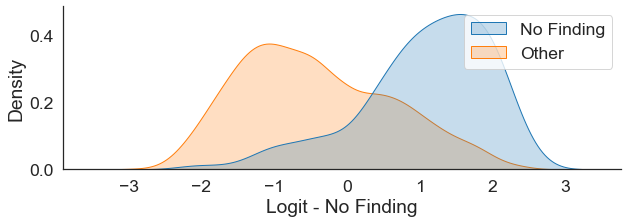

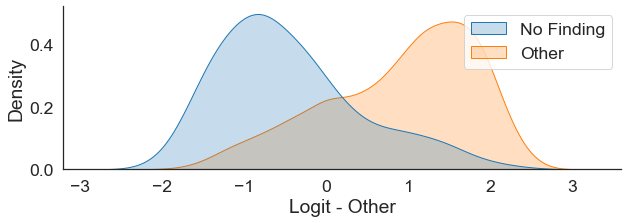

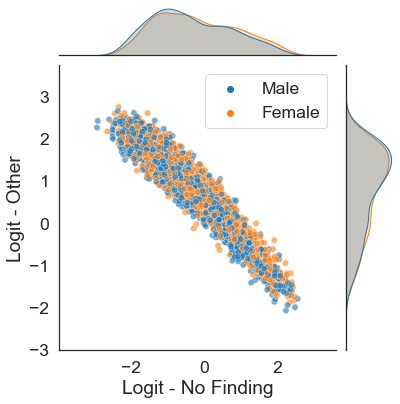

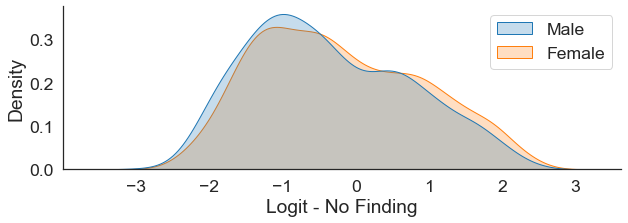

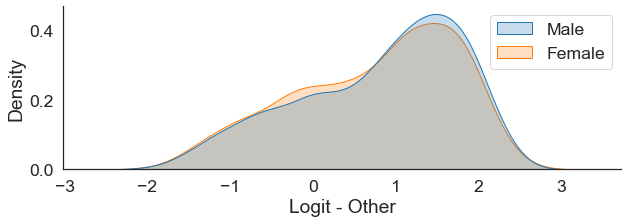

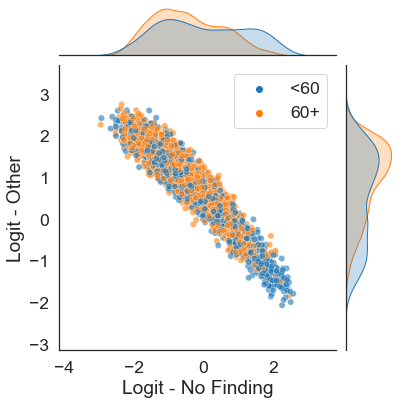

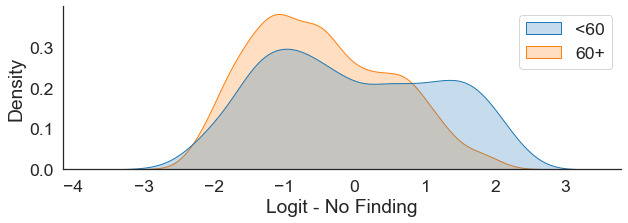

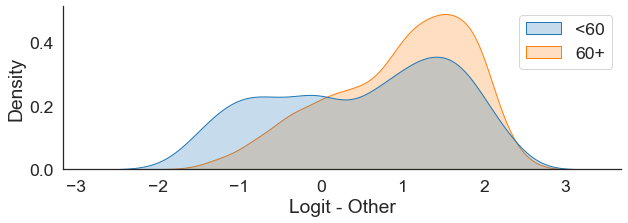

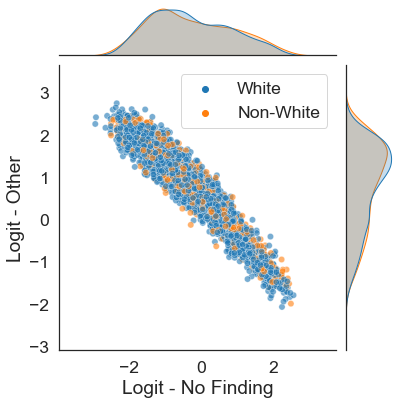

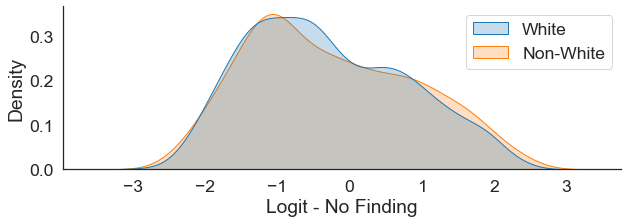

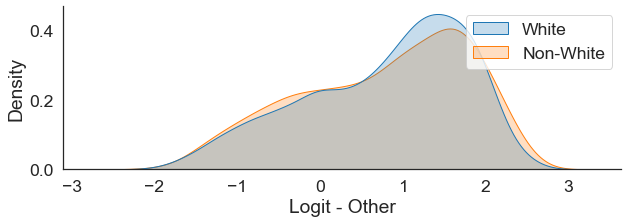

In [7]:
# Resnet18: Seed 46

# Without KD
plot_and_save_all_logits(
    model_id='r18-sam1-s46',
    model_dir='../../results/chexpert_no_old/resnet',
    data_name='chexpert_no_old',
    sample=True,
    teacher=False,
)

# With KD
plot_and_save_all_logits(
    model_id='r18-sam1-kd1-s46_r34-sam1-s43',
    model_dir='../../results/chexpert_no_old/kd',
    data_name='chexpert_no_old',
    sample=True,
    teacher=False,
)

##### Resnet34

/tmp/ipykernel_2806076/3016710375.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


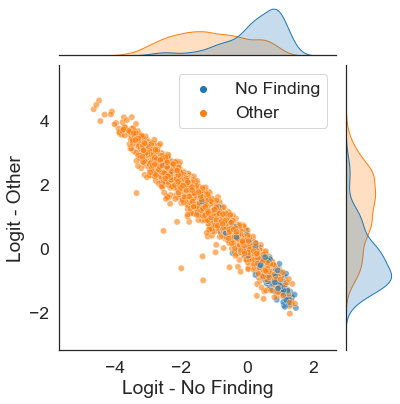

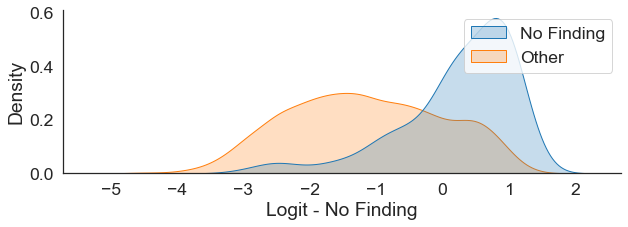

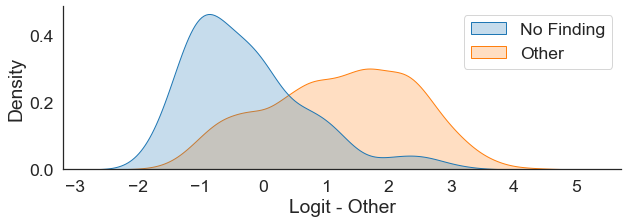

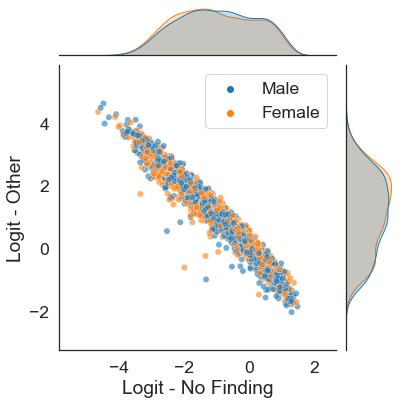

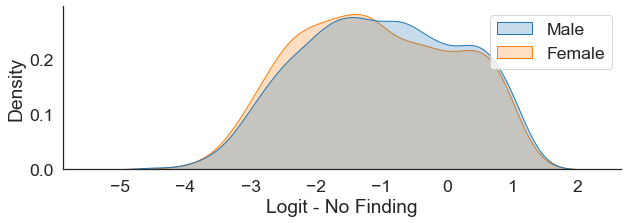

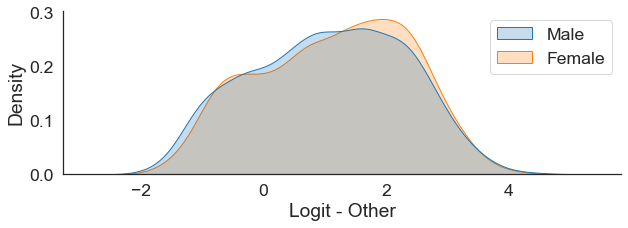

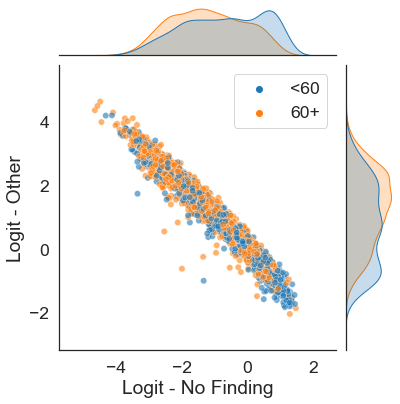

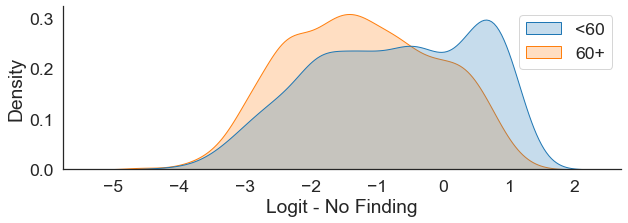

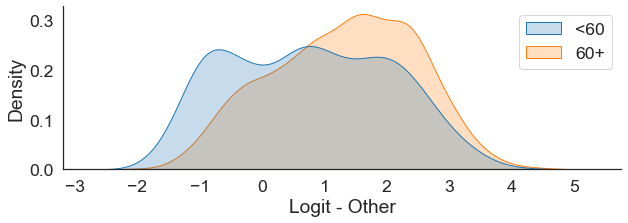

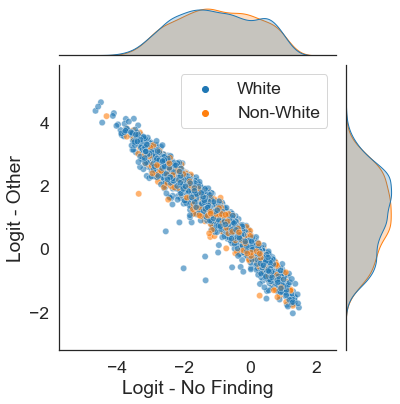

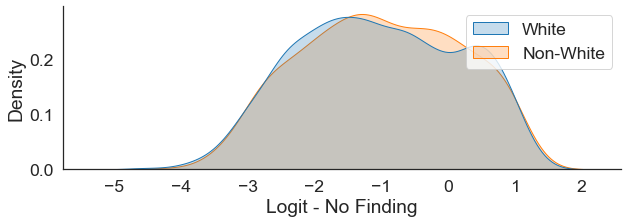

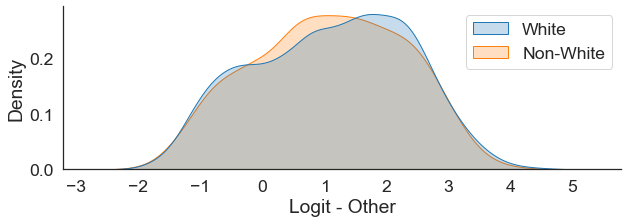

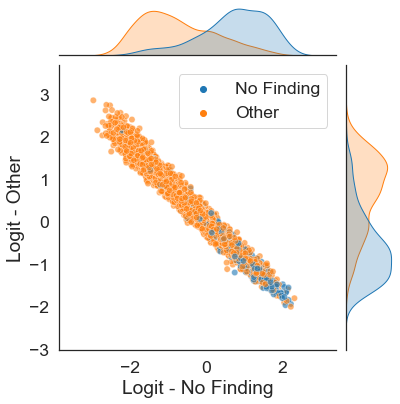

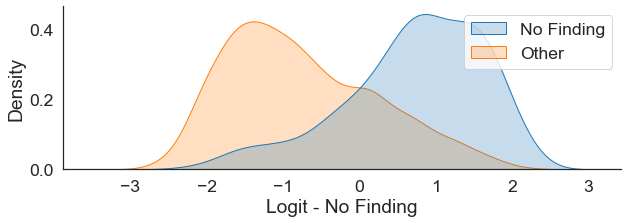

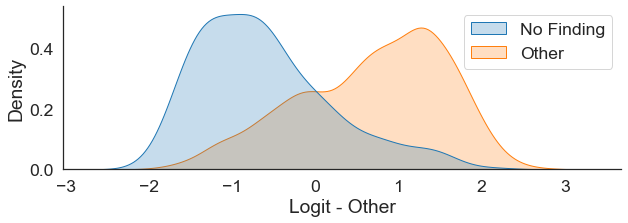

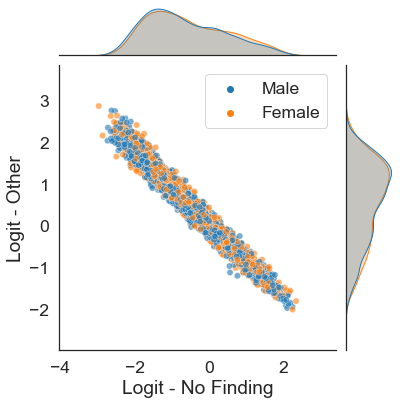

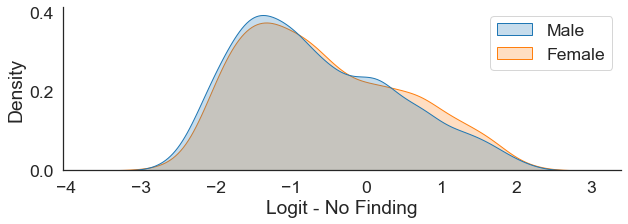

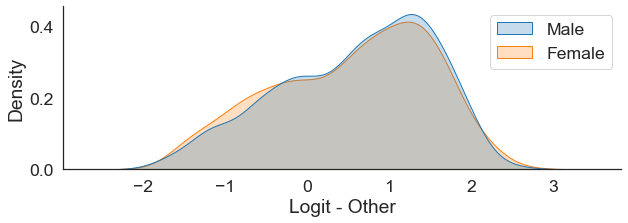

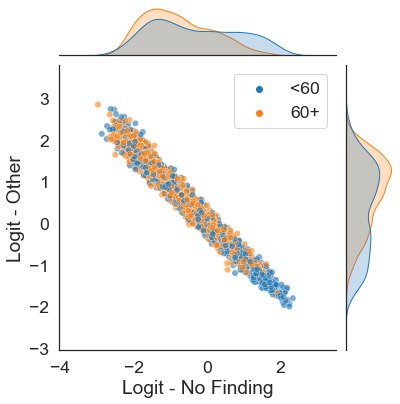

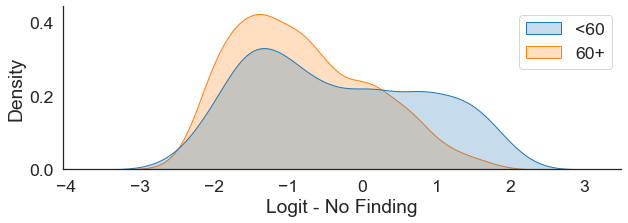

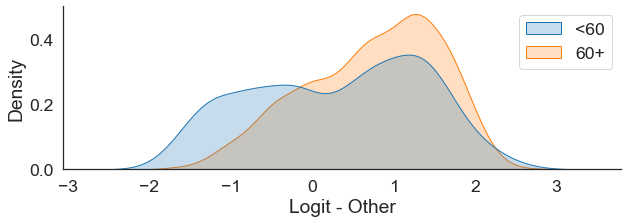

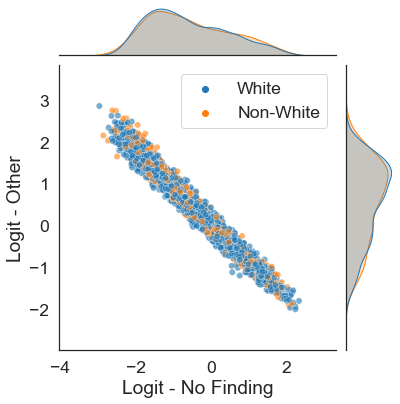

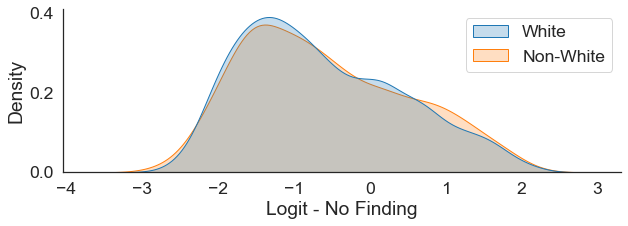

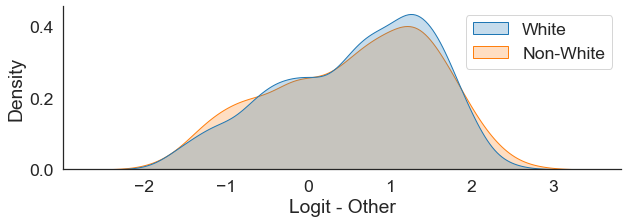

In [8]:
# Resnet34: Seed 45

# Without KD
plot_and_save_all_logits(
    model_id='r34-sam1-s45',
    model_dir='../../results/chexpert_no_old/resnet',
    data_name='chexpert_no_old',
    sample=True,
    teacher=False,
)

# With KD
plot_and_save_all_logits(
    model_id='r34-sam1-kd1-s45_r34-sam1-s43',
    model_dir='../../results/chexpert_no_old/kd',
    data_name='chexpert_no_old',
    sample=True,
    teacher=False,
)

#### No White

##### Resnet18

/tmp/ipykernel_2806076/3016710375.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


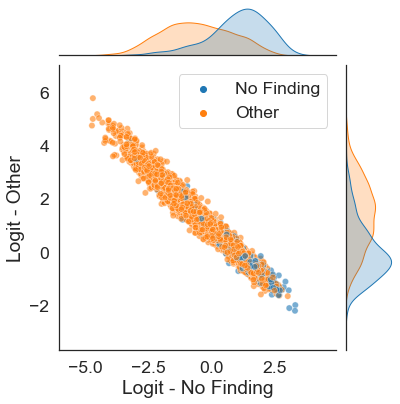

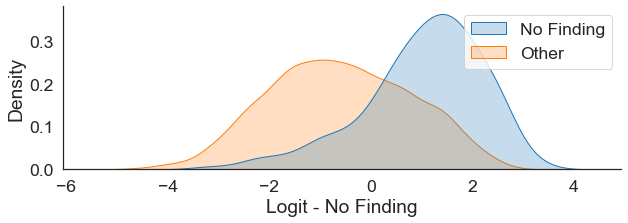

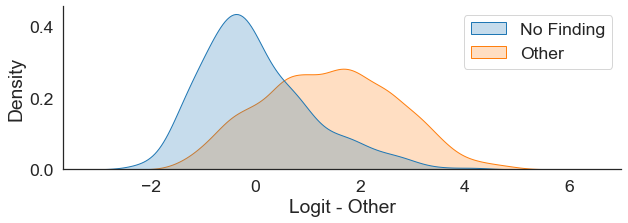

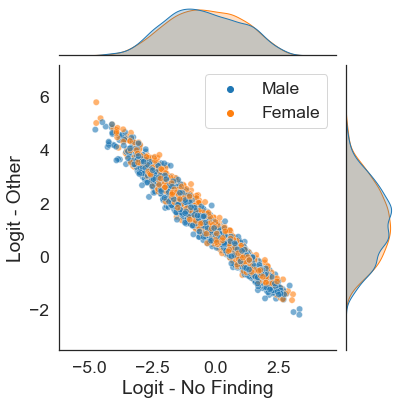

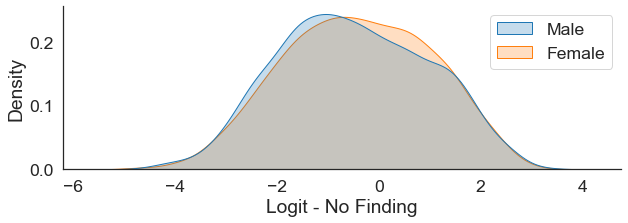

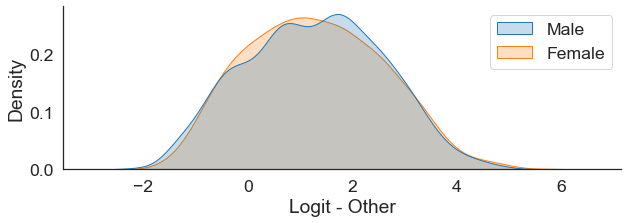

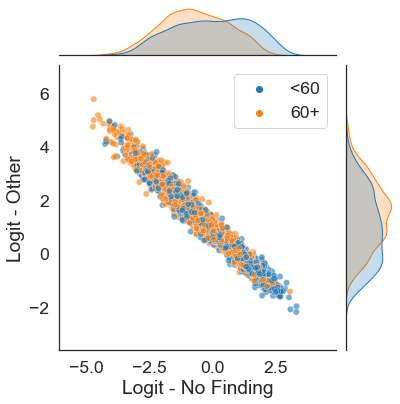

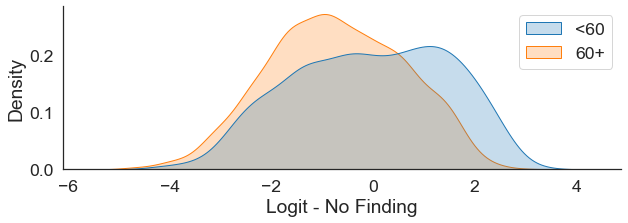

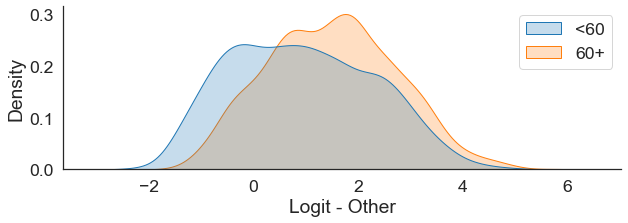

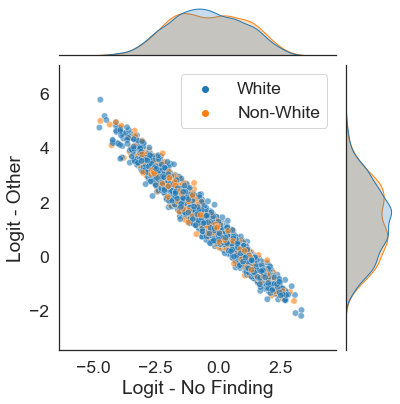

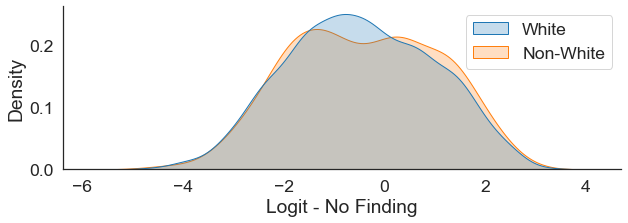

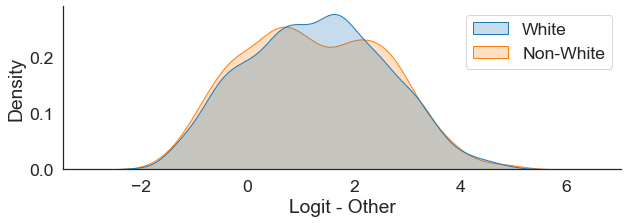

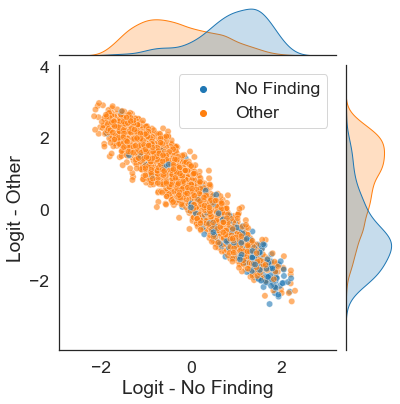

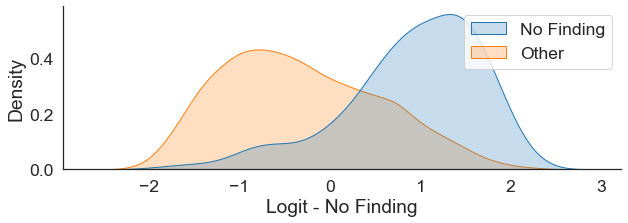

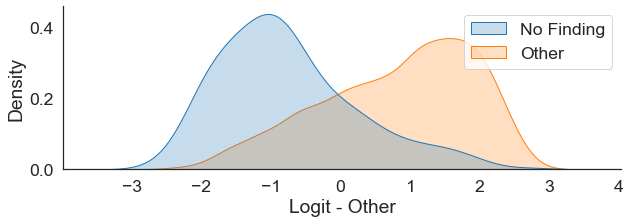

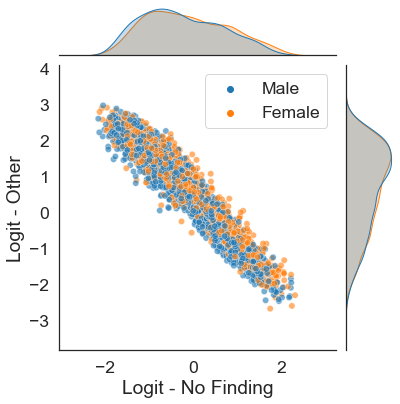

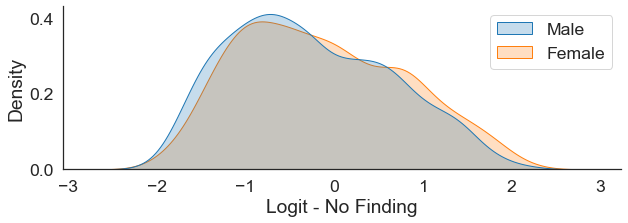

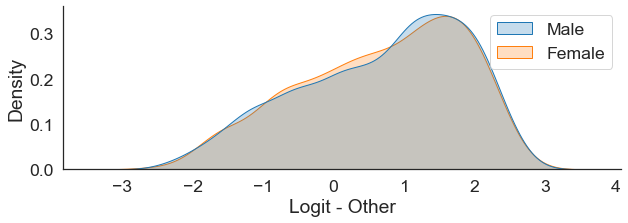

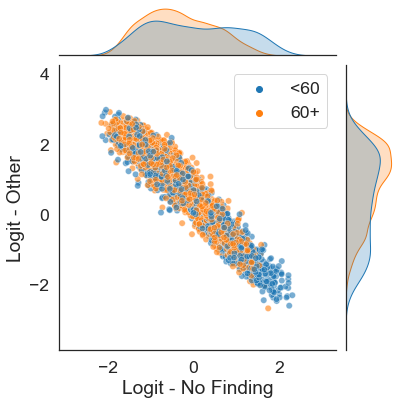

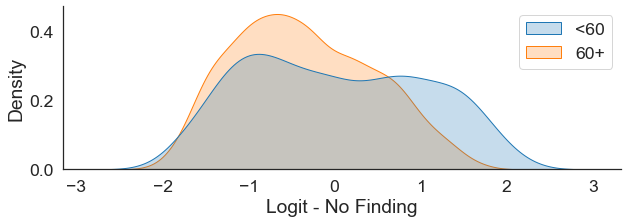

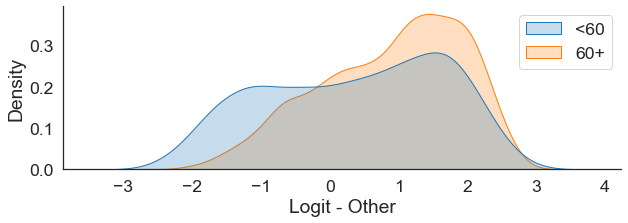

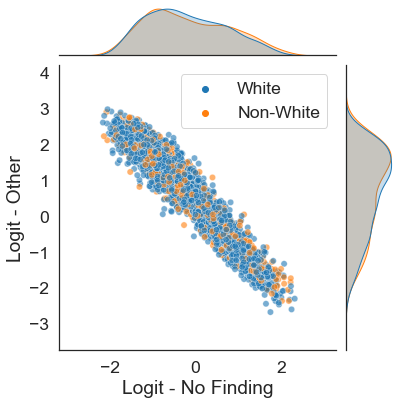

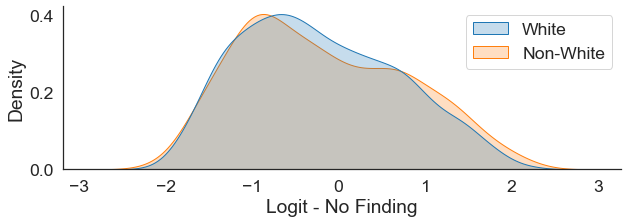

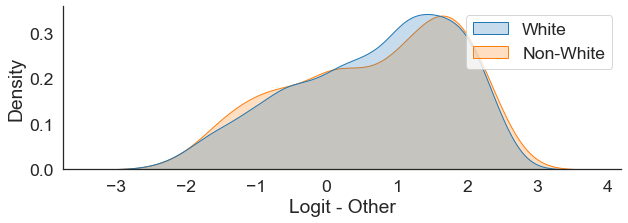

In [9]:
# Resnet18: Seed 46

# Without KD
plot_and_save_all_logits(
    model_id='r18-sam1-s46',
    model_dir='../../results/chexpert_no_white/resnet',
    data_name='chexpert_no_white',
    sample=True,
    teacher=False,
)

# With KD
plot_and_save_all_logits(
    model_id='r18-sam1-kd1-s46_r34-sam1-s43',
    model_dir='../../results/chexpert_no_white/kd',
    data_name='chexpert_no_white',
    sample=True,
    teacher=False,
)

##### Resnet34

/tmp/ipykernel_2806076/3016710375.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


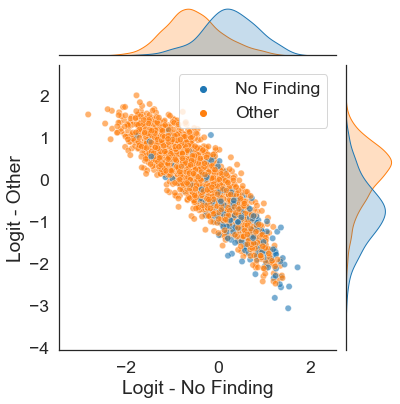

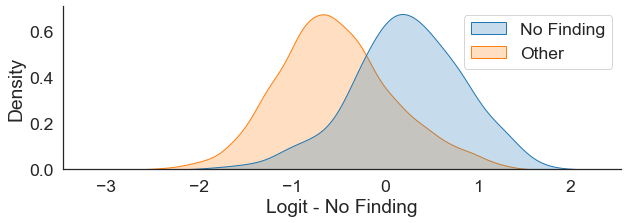

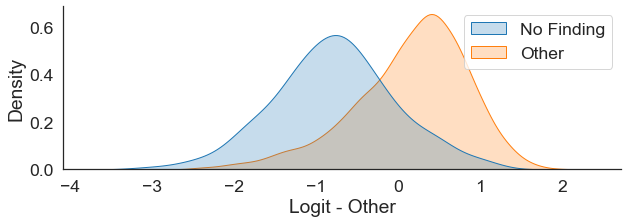

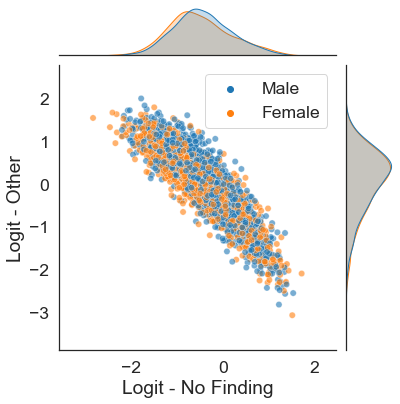

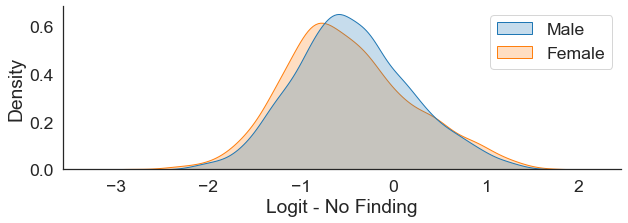

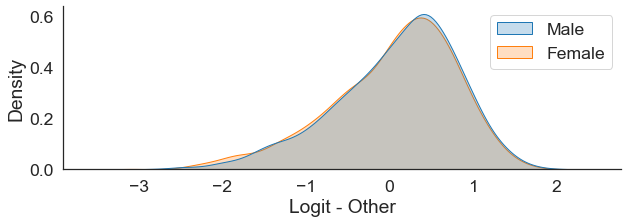

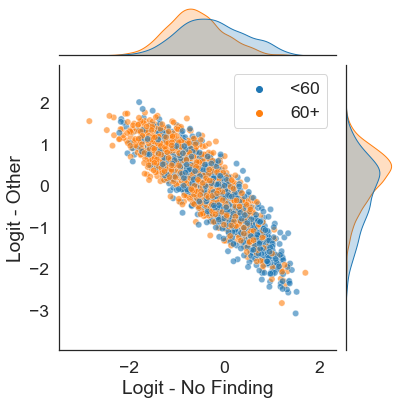

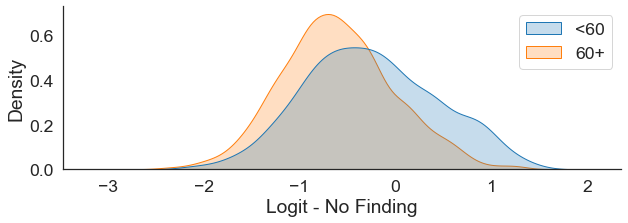

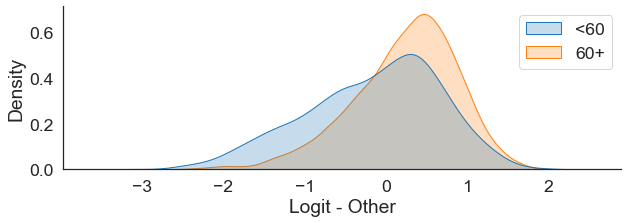

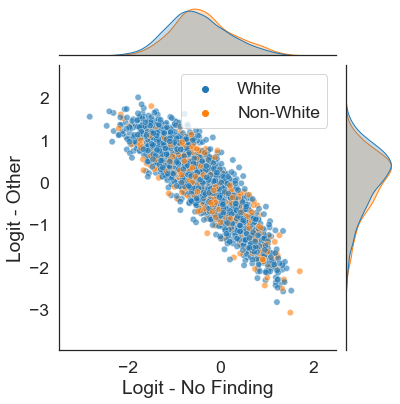

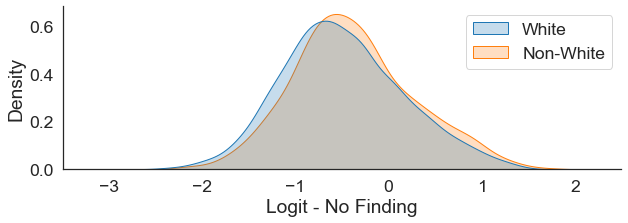

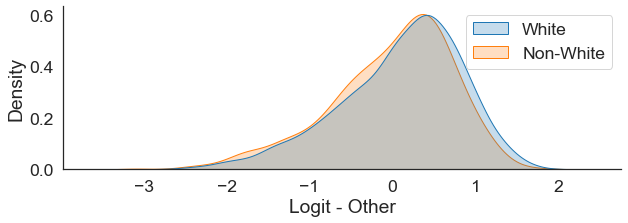

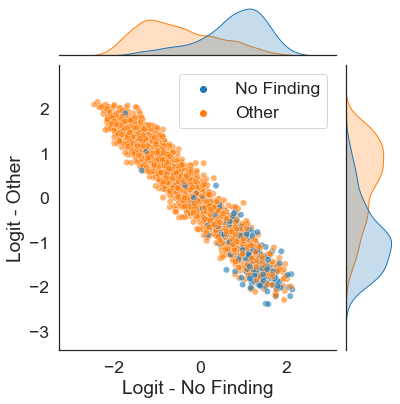

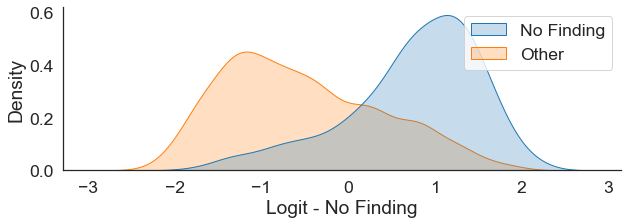

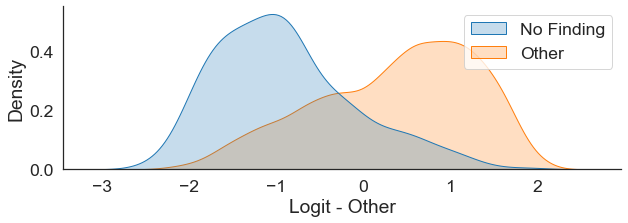

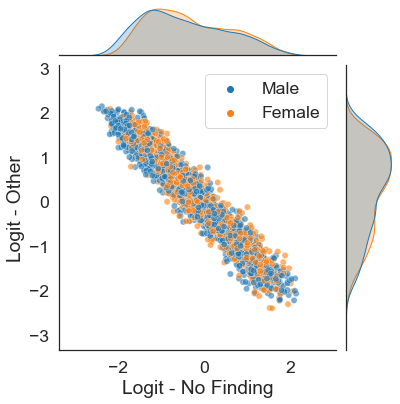

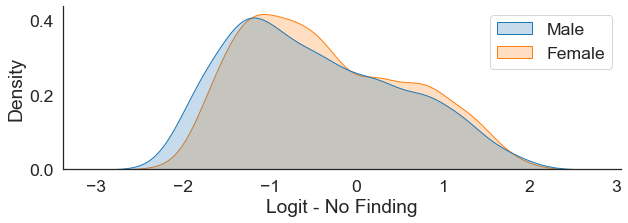

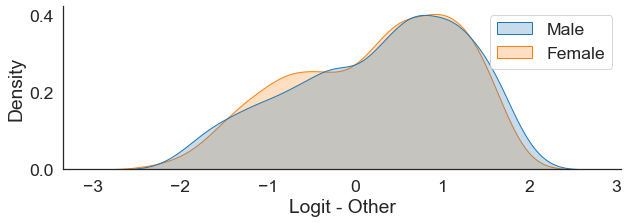

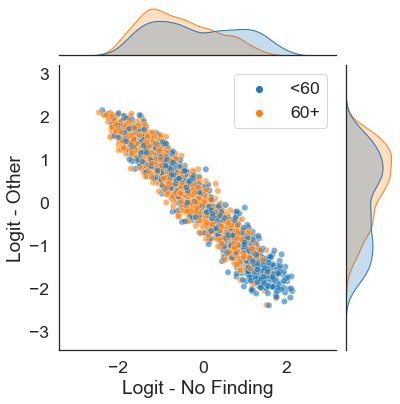

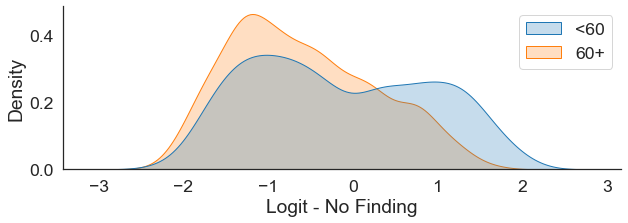

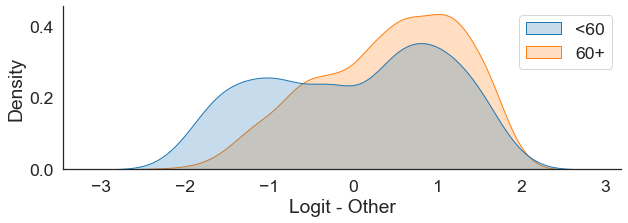

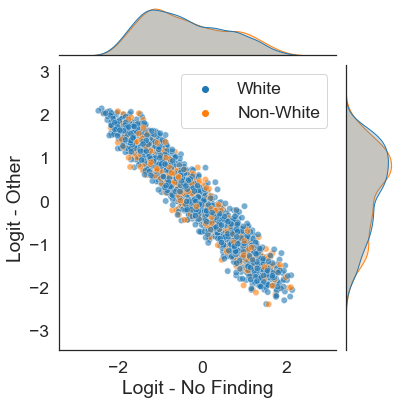

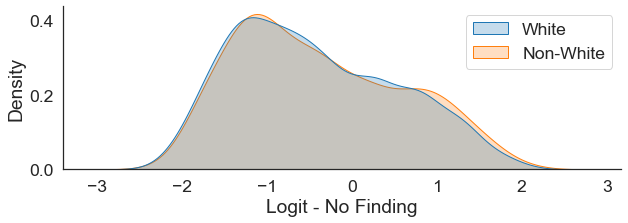

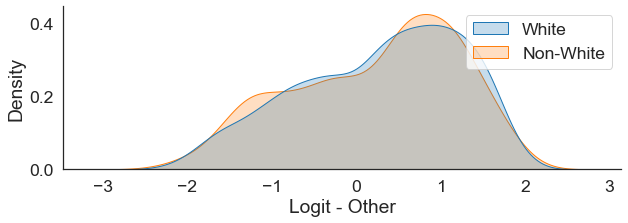

In [10]:
# Resnet34: Seed 45

# Without KD
plot_and_save_all_logits(
    model_id='r34-sam1-s45',
    model_dir='../../results/chexpert_no_white/resnet',
    data_name='chexpert_no_white',
    sample=True,
    teacher=False,
)

# With KD
plot_and_save_all_logits(
    model_id='r34-sam1-kd1-s45_r34-sam1-s43',
    model_dir='../../results/chexpert_no_white/kd',
    data_name='chexpert_no_white',
    sample=True,
    teacher=False,
)